In [20]:
import cv2
import numpy
import os
import pytesseract
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
image_path = "./delhi-1.jpeg"



In [22]:
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [23]:
def plot_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)

    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)

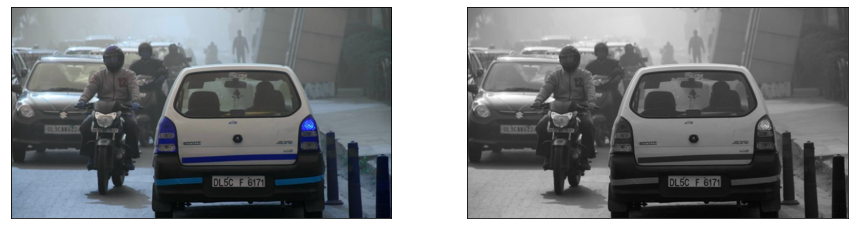

In [24]:
plot_images(image, gray)


In [26]:
blur = cv2.bilateralFilter(gray, 11,90, 90)


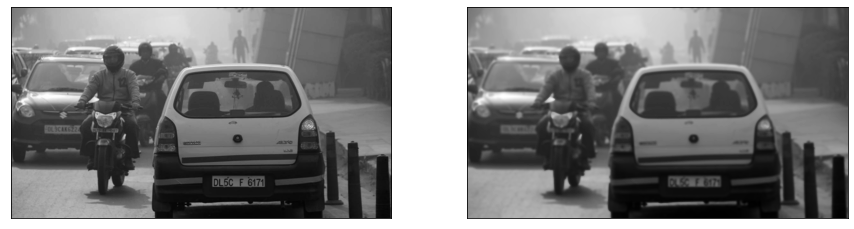

In [27]:
plot_images(gray, blur)



In [51]:
edges = cv2.Canny(gray,40,200)


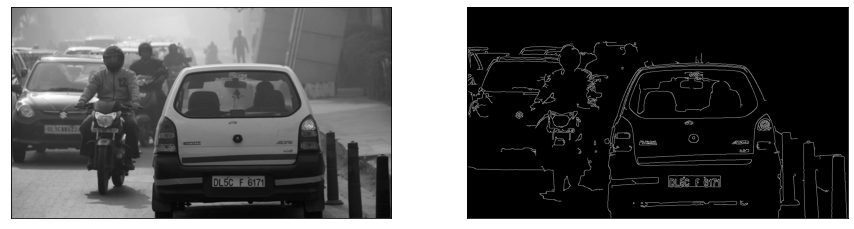

In [52]:
plot_images(gray, edges)


In [122]:
cnts, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)


In [123]:
image_copy = image.copy()
print(len(cnts))



228


In [124]:
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)


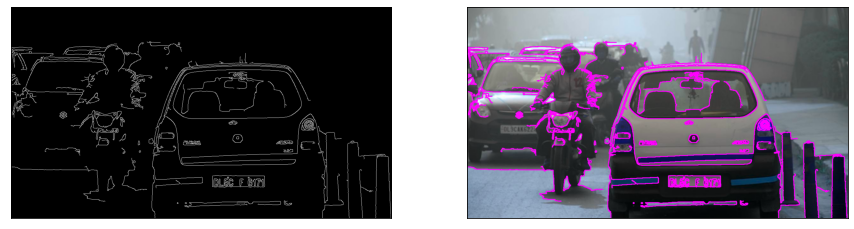

In [125]:
plot_images(edges, image_copy)


In [129]:
plate = None
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    edges_count = cv2.approxPolyDP(c, 0.02 * perimeter, True)
    if len(edges_count) == 4:
        x,y,w,h = cv2.boundingRect(c)
        plate = image[y:y+h, x:x+w]
        break



TypeError: Image data of dtype object cannot be converted to float

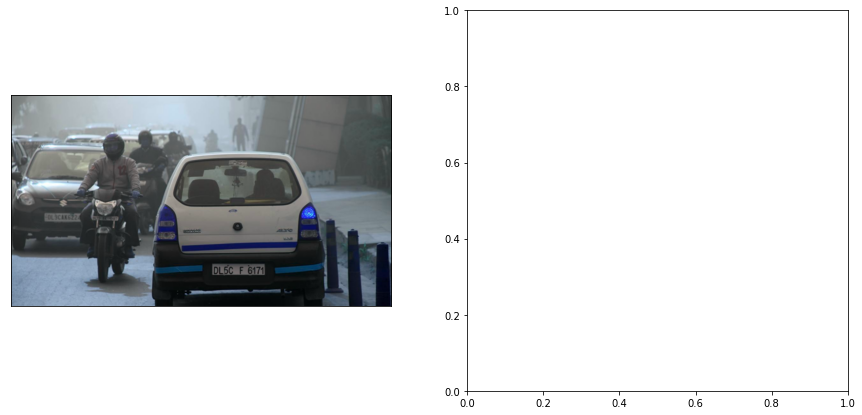

In [99]:
plot_images(image, plate)
